# **STEAD (Standford Earthquake Dataset)**

# **Import Libraries and Data**

Sample Earthquake Sensor <br>
<img src='https://drive.google.com/uc?export=view&id=1wymooQEp3cvLcF2UeCgKVmN0zXt2VaEV'>

In [ ]:
!pip install imblearn

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Preprocessing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SMOTE 

# Metrics
from sklearn.metrics import classification_report, f1_score

In [ ]:
#df_train = pd.read_csv("/content/drive/My Drive/Projek/Final_Anforcom2020/train.csv")
#df_test = pd.read_csv("/content/drive/My Drive/Projek/Final_Anforcom2020/test.csv")
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,id,phase,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,...,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,station,network
0,0,After Coda End,-40.060604,-260.707855,-2295.125732,-5077.934570,-6510.237793,-6507.307617,-6570.841309,-6639.744141,...,-1636.636719,-481.137634,1250.591431,3423.129150,5408.335938,7083.473633,8639.500977,9888.334961,AOS,HT
1,1,After Coda End,-918.338989,-130.808212,-180.710327,-888.181763,-1270.482300,-1396.425903,-1328.800293,-1324.853394,...,-606.994751,-341.463318,-216.040726,-132.499832,415.490448,750.097290,1068.296143,1360.592407,AOS,HT
2,2,S Wave,-19588.193359,-22775.435547,-14151.219727,-1106.306152,479.042145,8777.960938,27075.169922,24998.861328,...,-6982.862305,-3364.717285,6015.947266,-10893.664062,-9635.690430,2515.936035,5403.634766,7697.293945,AC04,C1
3,3,Before P Arrival,71.364502,102.589439,140.858856,113.558861,72.772079,97.952866,132.099426,98.619576,...,-33.640625,-28.372875,-31.518494,-40.343090,-43.658840,-37.447033,-41.053375,-54.754852,AOS,HT
4,4,After Coda End,11264.663086,16095.182617,16701.796875,15911.804688,13841.098633,11352.826172,9862.090820,9329.799805,...,122089.867188,141905.125000,157348.359375,169389.234375,178161.437500,185418.484375,191004.015625,193284.250000,AMT,HP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881,35881,After Coda End,7880.614746,8688.561523,8825.509766,8084.964844,6757.714355,5400.477051,4112.736816,2953.214600,...,5244.672852,5314.038086,5058.224609,4660.564941,4446.166016,4281.390625,3773.695312,2911.149658,AOS,HT
35882,35882,After Coda End,-1862.605469,-1015.105225,-1491.742554,112.670189,458.357025,-548.750671,5934.537109,447.223450,...,-1411.695557,-392.345581,-1772.229004,1347.075806,-1261.064331,-1045.916626,1086.603638,-1823.545044,AMT,HP
35883,35883,After Coda End,-4897.524414,-4547.483887,-3450.159668,-2070.732422,-739.391541,1491.856323,4499.432617,6384.674316,...,-1704.147461,-338.344818,1034.946045,2605.394775,4317.965820,5215.839355,5016.916016,3708.820557,AOS,HT
35884,35884,P Wave,-21840.333984,-21545.867188,1763.364014,63479.605469,107657.640625,97654.109375,24631.556641,-40136.253906,...,-30890.181641,-184053.984375,-106792.765625,92609.710938,65886.500000,165103.140625,146718.015625,-80342.414062,AC04,C1


# **Exploratory Data Analysis**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35886 entries, 0 to 35885
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       35886 non-null  int64  
 1   phase    35886 non-null  object 
 2   E-1      35886 non-null  float64
 3   E-2      35886 non-null  float64
 4   E-3      35886 non-null  float64
 5   E-4      35886 non-null  float64
 6   E-5      35886 non-null  float64
 7   E-6      35886 non-null  float64
 8   E-7      35886 non-null  float64
 9   E-8      35886 non-null  float64
 10  E-9      35886 non-null  float64
 11  E-10     35886 non-null  float64
 12  E-11     35886 non-null  float64
 13  E-12     35886 non-null  float64
 14  E-13     35886 non-null  float64
 15  E-14     35886 non-null  float64
 16  E-15     35886 non-null  float64
 17  E-16     35886 non-null  float64
 18  E-17     35886 non-null  float64
 19  E-18     35886 non-null  float64
 20  E-19     35886 non-null  float64
 21  E-20     358

In [ ]:
df_train.describe()

,id,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,...,Z-11,Z-12,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20
count,35886.000000,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,...,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04,3.588600e+04
mean,17942.500000,-4.415238e+00,-4.257516e+00,-4.854258e+00,-5.821791e+00,-6.156094e+00,-5.510437e+00,-4.453830e+00,-3.531146e+00,-2.765893e+00,...,2.229942e+00,2.346831e+00,2.467282e+00,2.227978e+00,1.601603e+00,1.087088e+00,8.129724e-01,4.609443e-01,-2.104810e-01,-9.501105e-01
std,10359.540217,1.558718e+05,1.558718e+05,1.558719e+05,1.558719e+05,1.558719e+05,1.558720e+05,1.558720e+05,1.558721e+05,1.558721e+05,...,1.349510e+05,1.349510e+05,1.349511e+05,1.349511e+05,1.349511e+05,1.349511e+05,1.349511e+05,1.349511e+05,1.349512e+05,1.349512e+05
min,0.000000,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,-3.034737e+06,...,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06,-2.238622e+06
25%,8971.250000,-7.001987e+03,-7.001987e+03,-7.002524e+03,-7.006337e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,-7.010148e+03,...,-4.536857e+03,-4.538395e+03,-4.540089e+03,-4.540827e+03,-4.553480e+03,-4.554922e+03,-4.556930e+03,-4.558156e+03,-4.560736e+03,-4.563558e+03
50%,17942.500000,-6.887205e+00,-6.857949e+00,-6.887205e+00,-6.944375e+00,-6.984556e+00,-6.984556e+00,-6.980638e+00,-6.944375e+00,-6.857949e+00,...,9.691216e-02,1.660878e-01,2.611383e-01,2.611383e-01,1.660878e-01,1.660878e-01,3.233413e-01,3.889962e-01,3.889962e-01,4.402889e-01
75%,26913.750000,6.505354e+03,6.505354e+03,6.505354e+03,6.505354e+03,6.505354e+03,6.509929e+03,6.521506e+03,6.522918e+03,6.524906e+03,...,4.679880e+03,4.680969e+03,4.683964e+03,4.685352e+03,4.685352e+03,4.685352e+03,4.686249e+03,4.689609e+03,4.689609e+03,4.689609e+03
max,35885.000000,3.091702e+06,3.091702e+06,3.091702e+06,3.091702e+06,3.091702e+06,3.091702e+06,3.091702e+06,3.091702e+06,3.091702e+06,...,2.909798e+06,2.909798e+06,2.909798e+06,2.909798e+06,2.909798e+06,2.909798e+06,2.909798e+06,2.909798e+06,2.909798e+06,2.909798e+06


In [ ]:
print("station", df_train["station"].unique())
print("network", df_train["network"].unique())
print("phase", df_train["phase"].unique())

station ['AOS' 'AC04' 'AMT']
network ['HT' 'C1' 'HP']
phase ['After Coda End' 'S Wave' 'Before P Arrival' 'S Arrival' 'P Wave'
 'Coda End' 'P Arrival']


<AxesSubplot:>

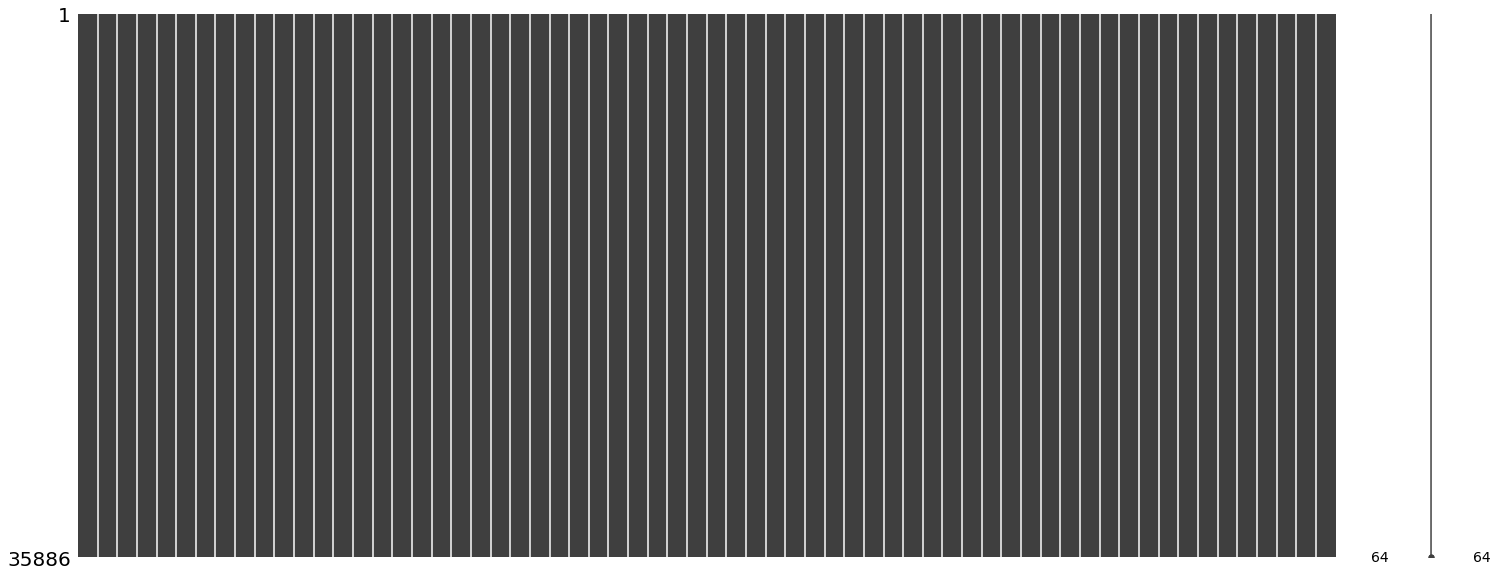

In [ ]:
import missingno as msno
#msno.bar(df_train.sample(35886))
msno.matrix(df_train.sample(35886))

<AxesSubplot:>

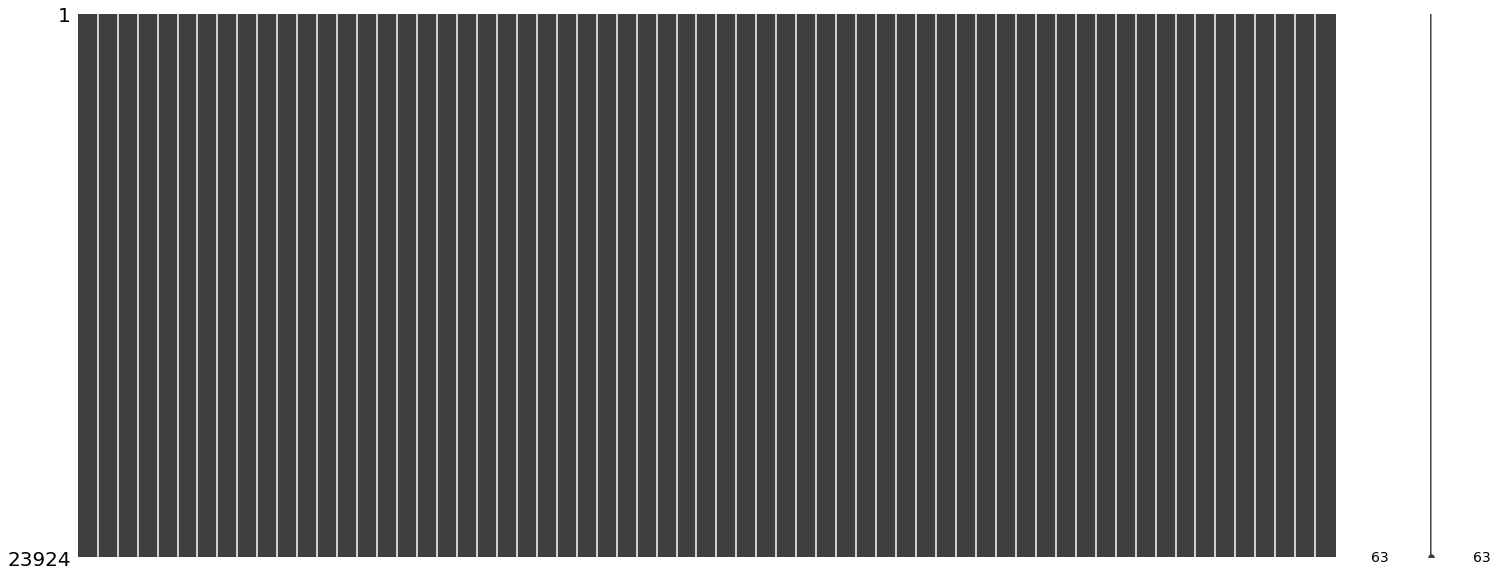

In [ ]:
msno.matrix(df_test.sample(23924))

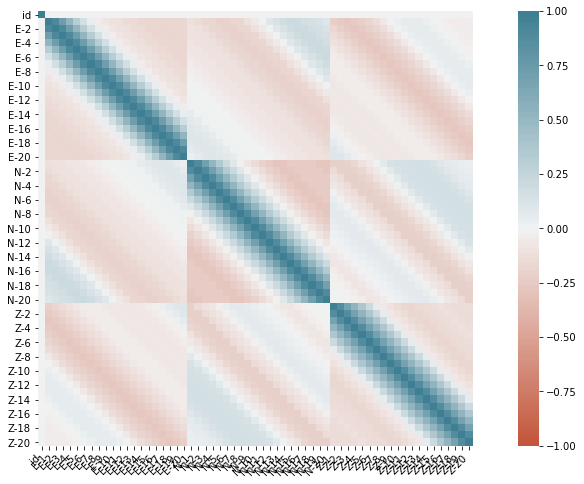

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
df_train['phase']

0          After Coda End
1          After Coda End
2                  S Wave
3        Before P Arrival
4          After Coda End
               ...       
35881      After Coda End
35882      After Coda End
35883      After Coda End
35884              P Wave
35885      After Coda End
Name: phase, Length: 35886, dtype: object

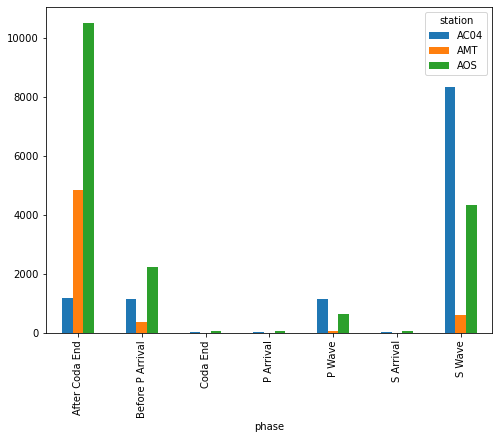

In [ ]:
df_train.groupby(['phase', 'station'] )['phase'].count().unstack(1).plot.bar(figsize=(8, 6));

C:\Users\AZHAR IE\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phase', ylabel='count'>

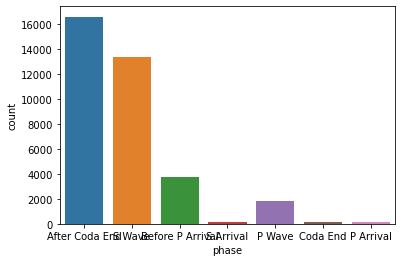

In [ ]:
sns.countplot(df_train["phase"])

In [ ]:
df_train["phase"].value_counts()

After Coda End      16562
S Wave              13322
Before P Arrival     3780
P Wave               1862
S Arrival             120
Coda End              120
P Arrival             120
Name: phase, dtype: int64

# **Data Preprocessing**

## Data Labelling

In [ ]:
# Encoding label
phase_dict = {
    "Before P Arrival": 0,
    "P Arrival": 1,
    "P Wave": 2,
    "S Arrival": 3,
    "S Wave": 4,
    "Coda End": 5,
    "After Coda End": 6
}
df_train["phase"] = df_train["phase"].map(phase_dict)

In [ ]:
# Split
y = df_train["phase"]
X = df_train.drop(columns=["id", "phase"], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42)

id_test = df_test['id']
X_test = df_test.drop(columns="id", axis=1)
X_train

,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,E-10,...,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,station,network
9140,-5051.160645,-4944.296387,-4650.636230,-4562.810059,-4286.201172,-3830.604492,-3811.589355,-3365.574951,-3593.669922,-3088.872070,...,-3407.309814,-3101.219238,-2685.817627,-2229.513428,-1953.816406,-1505.568970,-893.490356,-1591.028076,AMT,HP
24585,348.124542,743.508057,1115.038086,1492.047607,1668.725586,1656.883911,1599.445312,1490.818359,1386.314209,1386.382568,...,-1748.163452,-1776.968750,-1761.952759,-1723.990234,-1599.225708,-1396.228271,-1136.950317,-918.289490,AOS,HT
9355,-58240.441406,-42371.886719,-10697.878906,7247.679199,63793.687500,126283.546875,86431.765625,-15579.285156,-75387.859375,-39078.882812,...,-50687.343750,-17701.353516,-37112.605469,-54903.218750,-35095.789062,-5161.003418,3698.249512,1126.730103,AOS,HT
18595,11153.886719,5934.044434,14270.303711,18754.261719,11978.619141,7215.736328,84.086815,-20800.453125,-43303.457031,-53825.265625,...,5644.424316,-1937.235352,-2198.768311,-10055.938477,-11730.303711,-6262.673340,3071.848877,8794.416016,AC04,C1
3466,-1253.313721,-1099.559570,-993.950928,-830.029602,-846.717224,-920.025208,-1051.858521,-1387.330078,-1846.509766,-2363.274170,...,1995.027588,1884.962402,1842.531372,1867.069092,1703.614624,1471.010376,1320.984985,1058.092529,AMT,HP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,-0.157449,6.813259,0.716103,-20.404093,-12.450810,9.287204,2.283282,-24.047642,-28.134163,-11.419543,...,102.449921,86.724968,72.044853,66.465851,68.983971,66.427101,62.218746,63.694279,AOS,HT
34646,-2580.726318,-2830.580322,-3131.401855,-3389.767822,-3710.196777,-4009.739990,-4314.248535,-4621.131348,-4957.522461,-5276.186523,...,10981.636719,11436.431641,11939.269531,12416.607422,12923.035156,13447.634766,13969.209961,14494.285156,AMT,HP
15040,837.250732,1116.741821,1298.816406,1461.708496,1567.157959,1582.656250,1683.924194,1784.375000,1789.509766,1736.909302,...,642.514343,712.772644,735.759338,628.964417,619.973755,597.165527,647.526917,741.350769,AOS,HT
25116,88.365448,103.380478,90.366539,70.521873,84.635170,111.087273,95.145996,77.115105,106.040924,129.400421,...,17.991949,20.005278,14.179412,8.211745,9.260589,14.407568,8.239035,-3.463021,AOS,HT


## Standar Scaling

In [ ]:
# scaling
st = StandardScaler()
X_train.iloc[:, :-2] = pd.DataFrame(st.fit_transform(X_train.values[:, :-2]), columns=X_train.columns.values[:-2], index=X_train.index)
X_val.iloc[:, :-2] = pd.DataFrame(st.transform(X_val.values[:, :-2]), columns=X_val.columns.values[:-2], index=X_val.index)
X_test.iloc[:, :-2] = pd.DataFrame(st.transform(X_test.values[:, :-2]), columns=X_test.columns.values[:-2], index=X_test.index)
X_train

C:\Users\AZHAR IE\miniconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
C:\Users\AZHAR IE\miniconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,E-10,...,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,station,network
9140,-0.030069,-0.029484,-0.026702,-0.027571,-0.025924,-0.021822,-0.020869,-0.016682,-0.018135,-0.014804,...,-0.025697,-0.022009,-0.015860,-0.012785,-0.010400,-0.006245,-0.002435,-0.007704,AMT,HP
24585,0.003373,0.006162,0.009794,0.011226,0.012036,0.013135,0.013457,0.013951,0.013403,0.013729,...,-0.013608,-0.012344,-0.009117,-0.009095,-0.007787,-0.005436,-0.004253,-0.002733,AOS,HT
9355,-0.359512,-0.264043,-0.064980,0.048106,0.408055,0.807060,0.551601,-0.093723,-0.472809,-0.244266,...,-0.370191,-0.128564,-0.267137,-0.397281,-0.254652,-0.033271,0.031847,0.012377,AOS,HT
18595,0.070302,0.038691,0.093066,0.121836,0.077757,0.048547,0.003844,-0.126656,-0.269618,-0.338284,...,0.040256,-0.013514,-0.012306,-0.069915,-0.082451,-0.041416,0.027170,0.069033,AC04,C1
3466,-0.006546,-0.005389,-0.003555,-0.003653,-0.003999,-0.003281,-0.003362,-0.004204,-0.007070,-0.010177,...,0.013666,0.014382,0.017191,0.017118,0.016555,0.015763,0.014098,0.011870,AMT,HP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,0.001216,0.001545,0.002741,0.001535,0.001319,0.002639,0.003325,0.004396,0.004445,0.004817,...,-0.000124,0.001258,0.004269,0.003974,0.004508,0.005378,0.004700,0.004523,AOS,HT
34646,-0.014767,-0.016237,-0.017085,-0.020055,-0.022253,-0.022964,-0.024057,-0.024602,-0.026773,-0.028749,...,0.079144,0.084090,0.090886,0.094125,0.099240,0.104312,0.108529,0.111149,AMT,HP
15040,0.006403,0.008501,0.010958,0.011031,0.011388,0.012662,0.013993,0.015803,0.015956,0.015964,...,0.003811,0.005827,0.009113,0.008080,0.008569,0.009302,0.009070,0.009530,AOS,HT
25116,0.001764,0.002150,0.003308,0.002117,0.001938,0.003288,0.003914,0.005034,0.005295,0.005715,...,-0.000740,0.000771,0.003847,0.003549,0.004068,0.004993,0.004297,0.004027,AOS,HT


## One Hot Encoding

In [ ]:
# one hot encoding
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe_features = ["station", "network"]
transformed_train = ohe.fit_transform(X_train[ohe_features])
transformed_val = ohe.transform(X_val[ohe_features])
transformed_test = ohe.transform(X_test[ohe_features])

ohe_train = pd.DataFrame(transformed_train, columns=ohe.get_feature_names(), index=X_train.index)
ohe_val = pd.DataFrame(transformed_val, columns=ohe.get_feature_names(), index=X_val.index)
ohe_test = pd.DataFrame(transformed_test, columns=ohe.get_feature_names(), index=X_test.index)

X_train = pd.concat([X_train, ohe_train], axis=1).drop(ohe_features, axis=1)
X_val = pd.concat([X_val, ohe_val], axis=1).drop(ohe_features, axis=1)
X_test = pd.concat([X_test, ohe_test], axis=1).drop(ohe_features, axis=1)
X_train

,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,E-9,E-10,...,Z-17,Z-18,Z-19,Z-20,x0_AC04,x0_AMT,x0_AOS,x1_C1,x1_HP,x1_HT
9140,-5051.160645,-4944.296387,-4650.636230,-4562.810059,-4286.201172,-3830.604492,-3811.589355,-3365.574951,-3593.669922,-3088.872070,...,-1953.816406,-1505.568970,-893.490356,-1591.028076,0.0,1.0,0.0,0.0,1.0,0.0
24585,348.124542,743.508057,1115.038086,1492.047607,1668.725586,1656.883911,1599.445312,1490.818359,1386.314209,1386.382568,...,-1599.225708,-1396.228271,-1136.950317,-918.289490,0.0,0.0,1.0,0.0,0.0,1.0
9355,-58240.441406,-42371.886719,-10697.878906,7247.679199,63793.687500,126283.546875,86431.765625,-15579.285156,-75387.859375,-39078.882812,...,-35095.789062,-5161.003418,3698.249512,1126.730103,0.0,0.0,1.0,0.0,0.0,1.0
18595,11153.886719,5934.044434,14270.303711,18754.261719,11978.619141,7215.736328,84.086815,-20800.453125,-43303.457031,-53825.265625,...,-11730.303711,-6262.673340,3071.848877,8794.416016,1.0,0.0,0.0,1.0,0.0,0.0
3466,-1253.313721,-1099.559570,-993.950928,-830.029602,-846.717224,-920.025208,-1051.858521,-1387.330078,-1846.509766,-2363.274170,...,1703.614624,1471.010376,1320.984985,1058.092529,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,-0.157449,6.813259,0.716103,-20.404093,-12.450810,9.287204,2.283282,-24.047642,-28.134163,-11.419543,...,68.983971,66.427101,62.218746,63.694279,0.0,0.0,1.0,0.0,0.0,1.0
34646,-2580.726318,-2830.580322,-3131.401855,-3389.767822,-3710.196777,-4009.739990,-4314.248535,-4621.131348,-4957.522461,-5276.186523,...,12923.035156,13447.634766,13969.209961,14494.285156,0.0,1.0,0.0,0.0,1.0,0.0
15040,837.250732,1116.741821,1298.816406,1461.708496,1567.157959,1582.656250,1683.924194,1784.375000,1789.509766,1736.909302,...,619.973755,597.165527,647.526917,741.350769,0.0,0.0,1.0,0.0,0.0,1.0
25116,88.365448,103.380478,90.366539,70.521873,84.635170,111.087273,95.145996,77.115105,106.040924,129.400421,...,9.260589,14.407568,8.239035,-3.463021,0.0,0.0,1.0,0.0,0.0,1.0


## Oversampling

In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(y_train_resampled.value_counts())

0    12421
1    12421
2    12421
3    12421
4    12421
5    12421
6    12421
Name: phase, dtype: int64


C:\Users\AZHAR IE\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phase', ylabel='count'>

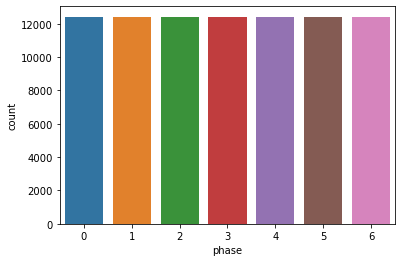

In [ ]:
sns.countplot(y_train_resampled)

# **Data Modelling**

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , train_test_split

#parameters_search = {
#    "booster": ["gbtree","gblinear","dart"],
#    "min_child_weight ":[1,3,5],
#    "max_depth": [4, 6, 8, 10],
#    "subsample":[1,0.8],
#    "n_estimators": [100,300,500,1000],
#    "learning_rate": [0.001,0.05,0.1,1],
#}

parameters = {
    "max_depth": [2,3,5],
    "subsample":[0.8],
    "min_samples_split": [2,5],
}

model_dt = xgb.XGBClassifier(random_state=42)

#gscv_xgb = GridSearchCV(model_dt, parameters, cv=5,verbose = 3,scoring='f1_weighted',n_jobs=-1)
#gscv_xgb.fit(X_train_resampled,y_train_resampled)
rscv_dt = RandomizedSearchCV(model_dt, parameters,n_iter=3, cv=5,scoring="f1_weighted", verbose = 3,error_score=0)
%time rscv_dt.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] subsample=0.8, min_samples_split=2, max_depth=3 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, min_samples_split=2, max_depth=3, score=0.895, total= 3.2min
[CV] subsample=0.8, min_samples_split=2, max_depth=3 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV]  subsample=0.8, min_samples_split=2, max_depth=3, score=0.895, total= 3.2min
[CV] subsample=0.8, min_samples_split=2, max_depth=3 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.4min remaining:    0.0s


[CV]  subsample=0.8, min_samples_split=2, max_depth=3, score=0.892, total= 3.2min
[CV] subsample=0.8, min_samples_split=2, max_depth=3 .................
[CV]  subsample=0.8, min_samples_split=2, max_depth=3, score=0.900, total= 3.2min
[CV] subsample=0.8, min_samples_split=2, max_depth=3 .................
[CV]  subsample=0.8, min_samples_split=2, max_depth=3, score=0.900, total= 3.2min
[CV] subsample=0.8, min_samples_split=5, max_depth=2 .................
[CV]  subsample=0.8, min_samples_split=5, max_depth=2, score=0.816, total= 2.2min
[CV] subsample=0.8, min_samples_split=5, max_depth=2 .................
[CV]  subsample=0.8, min_samples_split=5, max_depth=2, score=0.818, total= 2.2min
[CV] subsample=0.8, min_samples_split=5, max_depth=2 .................
[CV]  subsample=0.8, min_samples_split=5, max_depth=2, score=0.813, total= 2.2min
[CV] subsample=0.8, min_samples_split=5, max_depth=2 .................
[CV]  subsample=0.8, min_samples_split=5, max_depth=2, score=0.824, total= 2.2min


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 53.3min finished


CPU times: user 1h 13s, sys: 2.85 s, total: 1h 16s
Wall time: 1h 7s


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='dep

In [ ]:
print(rscv_dt.best_score_)
print(rscv_dt.best_params_)

0.9547112309860738
{'subsample': 0.8, 'min_samples_split': 5, 'max_depth': 5}


In [ ]:
model_dt = rscv_dt.best_estimator_

In [ ]:
y_predict_dt = model_dt.predict(X_val)
y_predict_dt

array([6, 6, 6, ..., 0, 6, 6])

In [ ]:
print(f1_score(y_val, y_predict_dt, average="weighted"))
print(classification_report(y_val, y_predict_dt))

0.8855395255037056
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       945
           1       0.71      0.90      0.79        30
           2       0.65      0.88      0.74       465
           3       0.67      0.73      0.70        30
           4       0.87      0.85      0.86      3331
           5       0.19      0.47      0.27        30
           6       0.93      0.89      0.91      4141

    accuracy                           0.88      8972
   macro avg       0.71      0.82      0.75      8972
weighted avg       0.89      0.88      0.89      8972



In [ ]:
y_predict_dt = model_dt.predict(X_test)
y_predict_dt

array([6, 4, 4, ..., 4, 4, 4])

In [ ]:
submission = pd.DataFrame({'id':id_test,
                           'phase':y_predict_dt})
submission.to_csv('test4.csv', index=False)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

model_rf= RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[100,200,300,400,500],
              'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
              'max_depth':np.arange(1,21),
              'bootstrap':[True,False],
              'min_samples_split':np.arange(2,11),
              'class_weight':['balanced', 'balanced_subsample'],
              'min_samples_leaf':np.arange(1,6)}

rscv = RandomizedSearchCV(model_rf, param_grid,n_iter=5, cv=5, verbose=3, scoring="f1_micro")
rscv.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV 1/5] END bootstrap=True, class_weight=balanced

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': [100, 200, 300, 400,
                                                 

In [ ]:
{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [ ]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [ ]:
rscv.best_score_

0.9713043734283291

In [ ]:
model_rf = rscv.best_estimator_

In [ ]:
y_predict = model_rf.predict(X_test)
y_predict

array([6, 4, 4, ..., 4, 4, 4], dtype=int64)

In [ ]:
len(y_predict)

23924

In [ ]:
submission = pd.DataFrame({'id':id_test,
                           'phase':y_predict})
submission.to_csv('test1.csv', index=False)

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , train_test_split

#parameters_search = {
#    "booster": ["gbtree","gblinear","dart"],
#    "min_child_weight ":[1,3,5],
#    "max_depth": [4, 6, 8, 10],
#    "subsample":[1,0.8],
#    "n_estimators": [100,300,500,1000],
#    "learning_rate": [0.001,0.05,0.1,1],
#}

parameters = {
    "min_child_weight ":[5],
    "max_depth": [10],
    "subsample":[0.8],
    "n_estimators": [500],
    "learning_rate": [0.05],
}

model_xgb = xgb.XGBClassifier(random_state=42)

gscv_xgb = GridSearchCV(model_xgb, parameters, cv=5,verbose = 3,scoring='f1_weighted',n_jobs=-1)
gscv_xgb.fit(X_train_resampled,y_train_resampled)
#rscv = RandomizedSearchCV(model_xgb, parameters,n_iter=5, cv=5,scoring="f1_weighted", verbose = 3,error_score=0)
#%time rscv.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 188.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [10],
                         'min_child_weight ': [5], 'n_estimators': [500],
                         'subsample

In [ ]:
print(gscv_xgb.best_score_)
print(gscv_xgb.best_params_)

0.9832390716616548
{'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight ': 5, 'n_estimators': 500, 'subsample': 0.8}


In [ ]:
model_xgb = gscv_xgb.best_estimator_

In [ ]:
y_predict_xgb = model_xgb.predict(X_val)
y_predict_xgb

array([6, 4, 6, ..., 0, 6, 6])

In [ ]:
print(f1_score(y_val, y_predict_xgb, average="weighted"))
print(classification_report(y_val, y_predict_xgb))

0.9447759605571688
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       945
           1       0.90      0.87      0.88        30
           2       0.86      0.87      0.86       465
           3       0.95      0.63      0.76        30
           4       0.91      0.95      0.93      3331
           5       1.00      0.47      0.64        30
           6       0.97      0.94      0.96      4141

    accuracy                           0.94      8972
   macro avg       0.94      0.82      0.86      8972
weighted avg       0.95      0.94      0.94      8972



In [ ]:
y_predict_xgb = model_xgb.predict(X_test)
y_predict_xgb

array([6, 4, 4, ..., 4, 4, 4])

In [ ]:
len(y_predict_xgb)

23924

In [ ]:
submission = pd.DataFrame({'id':id_test,
                           'phase':y_predict_xgb})
submission.to_csv('test2.csv', index=False)